In [1]:
# CCTV 데이터 : /content/01. CCTV_in_Seoul.csv
# 인구 데이터 : /content/01. population_in_Seoul.xls

In [2]:
# CCTV 데이터를 불러와서 처음 5개행 데이터를 보여줘.

import pandas as pd

cctv_df = pd.read_csv('/content/01. CCTV_in_Seoul.csv')
display(cctv_df.head())

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [3]:
# 현재 '기관명'이라는 컬럼명을 '구별'로 변경할께

cctv_df.rename(columns={'기관명': '구별'}, inplace=True)
display(cctv_df.head())

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [4]:
# 컬럼을 구별과 소계만 남기고 나머지 컬럼을 삭제해줘

cctv_df = cctv_df[['구별', '소계']]
display(cctv_df.head())

,구별,소계
0,강남구,2780
1,강동구,773
2,강북구,748
3,강서구,884
4,관악구,1496


In [5]:
# '소계' 컬럼명을 'CCTV대수'로 변경해줘

cctv_df.rename(columns={'소계': 'CCTV대수'}, inplace=True)
display(cctv_df.head())

,구별,CCTV대수
0,강남구,2780
1,강동구,773
2,강북구,748
3,강서구,884
4,관악구,1496


In [6]:
# 인구 데이터를 불러와서 처음 5개 행을 보여줘

population_df = pd.read_excel('/content/01. population_in_Seoul.xls')
display(population_df.head())

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [ ]:
# 현대 인구 데이터의 컬럼명이 3개 행에 걸쳐서 존재하는데 하나의 행으로 변경하고 싶어. '인구 합계 남자;를 '전체 남자'로 변경해줘.

# Task
Process the `population_df` DataFrame by combining the first two rows to form new column names, removing these initial rows, renaming the column '인구 합계 남자' to '전체 남자', and then displaying the first 5 rows of the updated DataFrame.

## 컬럼명 통합 및 설정

### Subtask:
DataFrame의 첫 두 행에 있는 정보를 결합하여 새로운 컬럼명으로 설정합니다.


**Reasoning**:
The first step is to reload the `population_df` using `pd.read_excel` with the `header` parameter set to `[0, 1]` to correctly interpret the first two rows as a MultiIndex header, as instructed.



In [7]:
population_df = pd.read_excel('/content/01. population_in_Seoul.xls', header=[0, 1])
display(population_df.head())

기간  자치구       세대        인구                                      \
         기간  자치구       세대        합계     합계.1     합계.2      한국인    한국인.1   
0        기간  자치구       세대         계       남자       여자        계       남자   
1  2017.1/4   합계  4202888  10197604  5000005  5197599  9926968  4871560   
2  2017.1/4  종로구    72654    162820    79675    83145   153589    75611   
3  2017.1/4   중구    59481    133240    65790    67450   124312    61656   
4  2017.1/4  용산구   106544    244203   119132   125071   229456   111167   

                                    세대당인구  65세이상고령자  
     한국인.2   등록외국인 등록외국인.1 등록외국인.2  세대당인구  65세이상고령자  
0       여자       계      남자      여자  세대당인구  65세이상고령자  
1  5055408  270636  128445  142191   2.36   1321458  
2    77978    9231    4064    5167   2.11     25425  
3    62656    8928    4134    4794   2.09     20764  
4   118289   14747    7965    6782   2.15     36231

**Reasoning**:
The next step is to flatten the MultiIndex columns of `population_df` into single-level column names by joining the elements of each tuple with a space and handling 'Unnamed' columns.



In [8]:
new_columns = []
for col in population_df.columns:
    if 'Unnamed' in col[0]:
        new_columns.append(col[1])
    elif 'Unnamed' in col[1]:
        new_columns.append(col[0])
    else:
        new_columns.append(f"{col[0]} {col[1]}")

population_df.columns = new_columns
display(population_df.head())

,기간 기간,자치구 자치구,세대 세대,인구 합계,인구 합계.1,인구 합계.2,인구 한국인,인구 한국인.1,인구 한국인.2,인구 등록외국인,인구 등록외국인.1,인구 등록외국인.2,세대당인구 세대당인구,65세이상고령자 65세이상고령자
0,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
1,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
2,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
3,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764
4,2017.1/4,용산구,106544,244203,119132,125071,229456,111167,118289,14747,7965,6782,2.15,36231


**Reasoning**:
The next step is to remove the first row (index 0) of `population_df` which contains redundant header information after the MultiIndex flattening. This aligns with the task instruction to 'removing these initial rows'.



In [9]:
population_df = population_df.iloc[1:]
display(population_df.head())

,기간 기간,자치구 자치구,세대 세대,인구 합계,인구 합계.1,인구 합계.2,인구 한국인,인구 한국인.1,인구 한국인.2,인구 등록외국인,인구 등록외국인.1,인구 등록외국인.2,세대당인구 세대당인구,65세이상고령자 65세이상고령자
1,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
2,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
3,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764
4,2017.1/4,용산구,106544,244203,119132,125071,229456,111167,118289,14747,7965,6782,2.15,36231
5,2017.1/4,성동구,130868,311244,153768,157476,303380,150076,153304,7864,3692,4172,2.32,39997


In [12]:
# '자치구 자치구', '인구 합계', '인구 합계.2', '65세이상고령자 65세이상고령자' 컬럼만 남기고 모두 삭제해줘.

population_df = population_df[['자치구 자치구', '인구 합계', '인구 합계.2', '65세이상고령자 65세이상고령자']]
display(population_df.head())

,자치구 자치구,인구 합계,인구 합계.2,65세이상고령자 65세이상고령자
1,합계,10197604,5197599,1321458
2,종로구,162820,83145,25425
3,중구,133240,67450,20764
4,용산구,244203,125071,36231
5,성동구,311244,157476,39997


In [13]:
# 컬럼명을 ['자치구 자치구', '인구 합계', '인구 합계.2', '65세이상고령자 65세이상고령자']에서 [구별, 전체 인구, 여성 인구, 65세고령자]로 변경해줘

population_df.rename(columns={
    '자치구 자치구': '구별',
    '인구 합계': '전체 인구',
    '인구 합계.2': '여성 인구',
    '65세이상고령자 65세이상고령자': '65세고령자'
}, inplace=True)
display(population_df.head())

,구별,전체 인구,여성 인구,65세고령자
1,합계,10197604,5197599,1321458
2,종로구,162820,83145,25425
3,중구,133240,67450,20764
4,용산구,244203,125071,36231
5,성동구,311244,157476,39997


**Reasoning**:
The next step is to rename the column '인구 합계.1' to '전체 남자' in `population_df` to align with the task instruction, and then display the first 5 rows of the updated DataFrame.



In [14]:
# 가공된 CCTV 데이터와 가공된 인구데이터를 동일한 구별이름으로 하나의 데이터로 합쳐줘

# Ensure '구별' column is string type in both DataFrames for consistent merging
cctv_df['구별'] = cctv_df['구별'].astype(str)
population_df['구별'] = population_df['구별'].astype(str)

# Merge the two DataFrames on the '구별' column
data_result_df = pd.merge(cctv_df, population_df, on='구별', how='inner')
display(data_result_df.head())

,구별,CCTV대수,전체 인구,여성 인구,65세고령자
0,강남구,2780,570500,297199,63167
1,강동구,773,453233,227806,54622
2,강북구,748,330192,168506,54813
3,강서구,884,603772,309339,72548
4,관악구,1496,525515,260752,68082


In [15]:
# 합쳐진 결과를 total.csv에 저장해줘

data_result_df.to_csv('total.csv', index=False)

In [16]:
import pandas as pd

# Read the CSV with utf-8 encoding to handle Korean characters correctly
corrected_df = pd.read_csv('total.csv', encoding='utf-8')

display(corrected_df.head())

,구별,CCTV대수,전체 인구,여성 인구,65세고령자
0,강남구,2780,570500,297199,63167
1,강동구,773,453233,227806,54622
2,강북구,748,330192,168506,54813
3,강서구,884,603772,309339,72548
4,관악구,1496,525515,260752,68082


In [18]:
corrected_df.to_csv('total2.csv', index=False, encoding='utf-8')

In [26]:
# Install Korean font
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Configure matplotlib to use the new font
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # This prevents minus signs from breaking

# Add NanumBarunGothic font explicitly to font manager
# This often helps ensure Matplotlib recognizes the newly installed font immediately
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)

print("Korean font setup complete. Please re-run the plotting cell now. If issues persist, a runtime restart might still be beneficial.")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

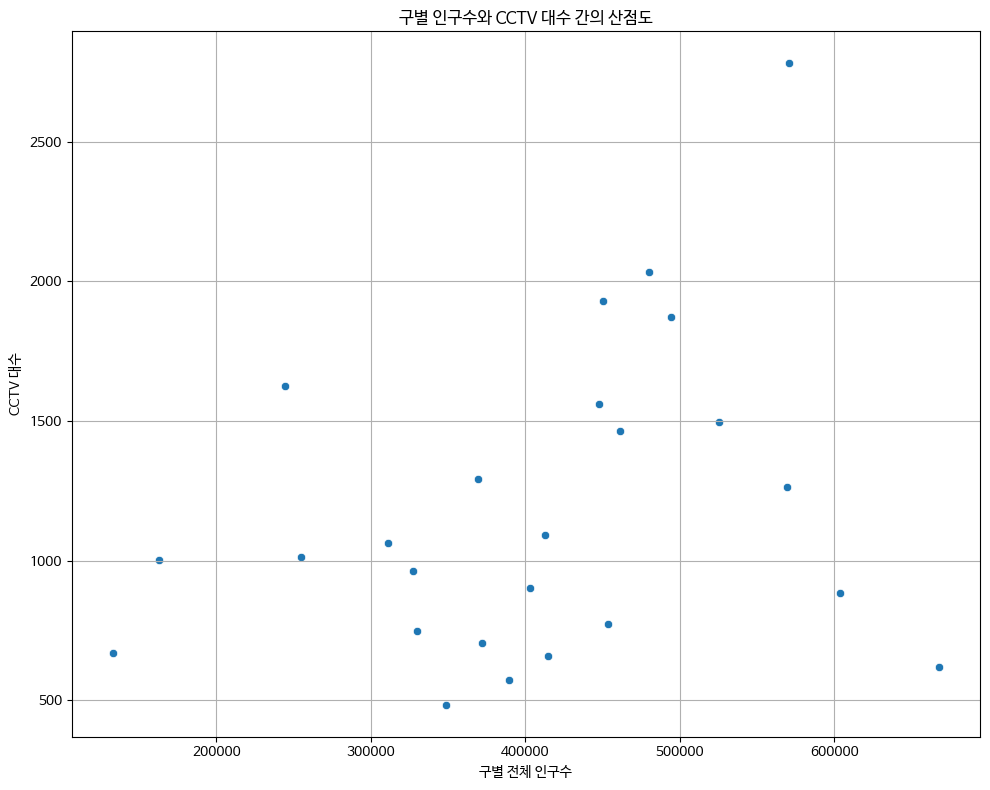

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='전체 인구', y='CCTV대수', data=corrected_df)
plt.title('구별 인구수와 CCTV 대수 간의 산점도')
plt.xlabel('구별 전체 인구수')
plt.ylabel('CCTV 대수')
plt.grid(True)
plt.tight_layout()
plt.show()

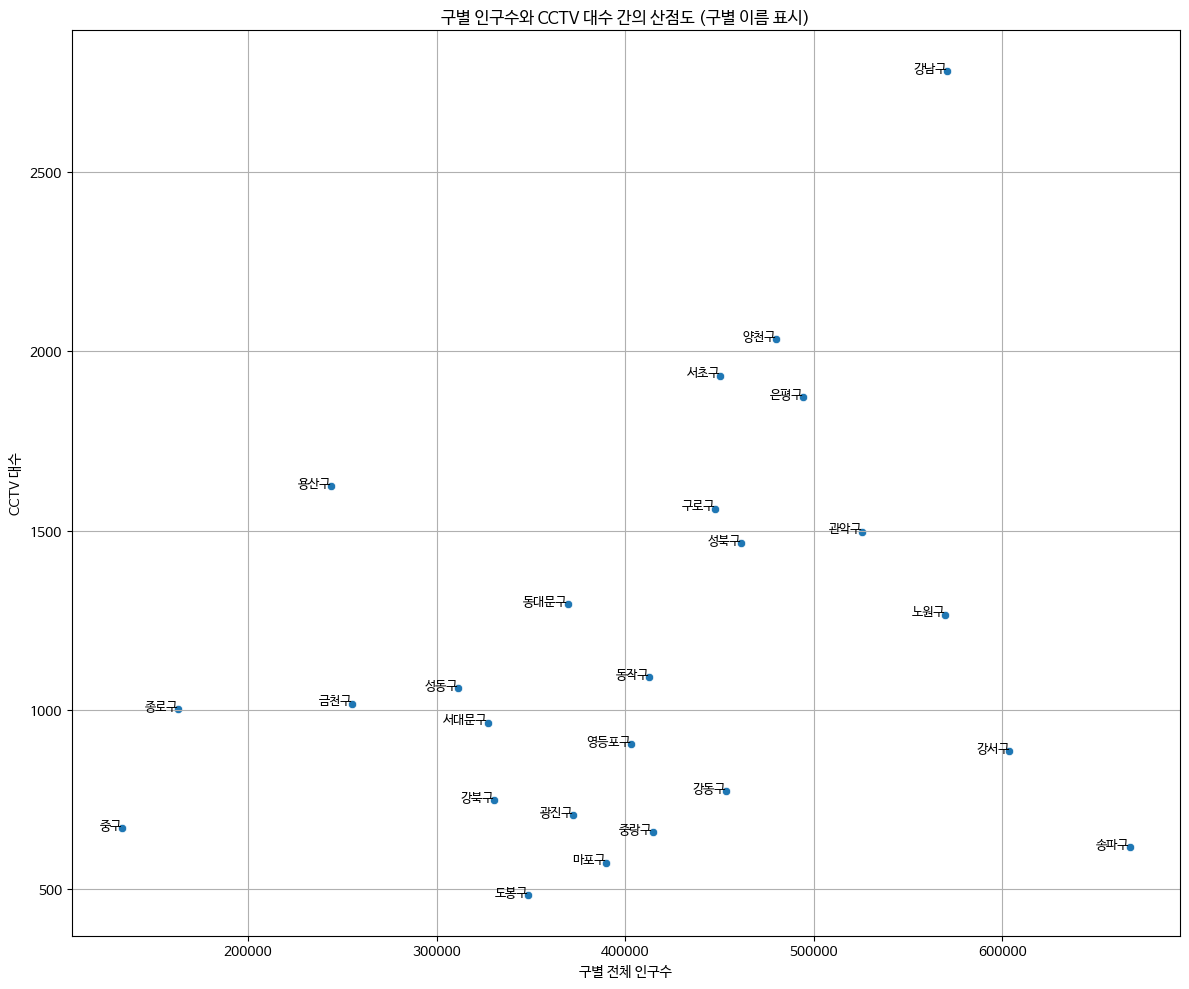

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.scatterplot(x='전체 인구', y='CCTV대수', data=corrected_df)

# Add '구별' labels to each point
for i, row in corrected_df.iterrows():
    plt.text(row['전체 인구'], row['CCTV대수'], row['구별'], fontsize=9, ha='right')

plt.title('구별 인구수와 CCTV 대수 간의 산점도 (구별 이름 표시)')
plt.xlabel('구별 전체 인구수')
plt.ylabel('CCTV 대수')
plt.grid(True)
plt.tight_layout()
plt.show()

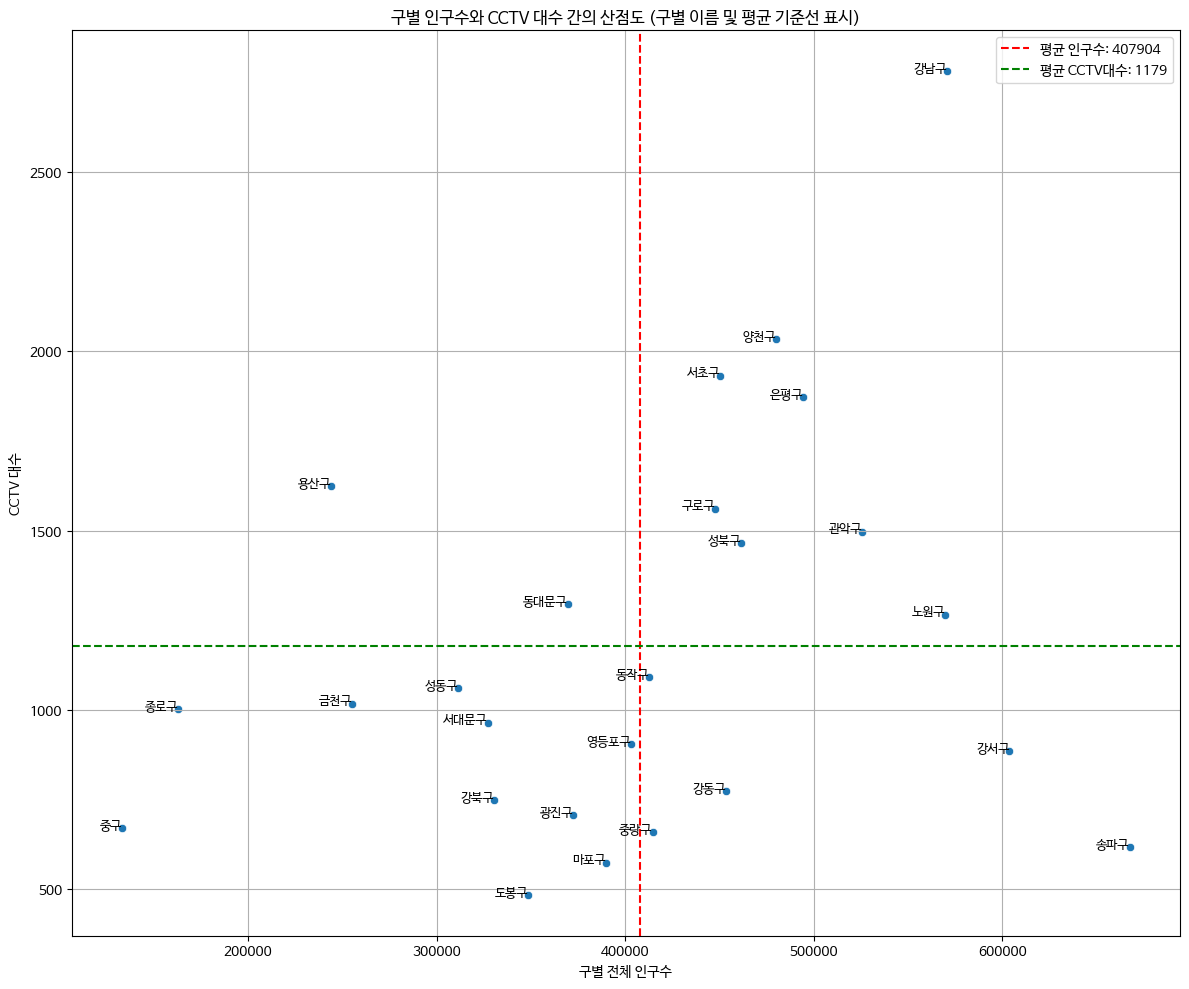

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.scatterplot(x='전체 인구', y='CCTV대수', data=corrected_df)

# Add '구별' labels to each point
for i, row in corrected_df.iterrows():
    plt.text(row['전체 인구'], row['CCTV대수'], row['구별'], fontsize=9, ha='right')

# Calculate means
mean_population = corrected_df['전체 인구'].mean()
mean_cctv = corrected_df['CCTV대수'].mean()

# Add mean lines
plt.axvline(x=mean_population, color='r', linestyle='--', label=f'평균 인구수: {mean_population:.0f}')
plt.axhline(y=mean_cctv, color='g', linestyle='--', label=f'평균 CCTV대수: {mean_cctv:.0f}')

plt.title('구별 인구수와 CCTV 대수 간의 산점도 (구별 이름 및 평균 기준선 표시)')
plt.xlabel('구별 전체 인구수')
plt.ylabel('CCTV 대수')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-4194313663.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CCTV대수', y='구별', data=cctv_sorted, palette='viridis')


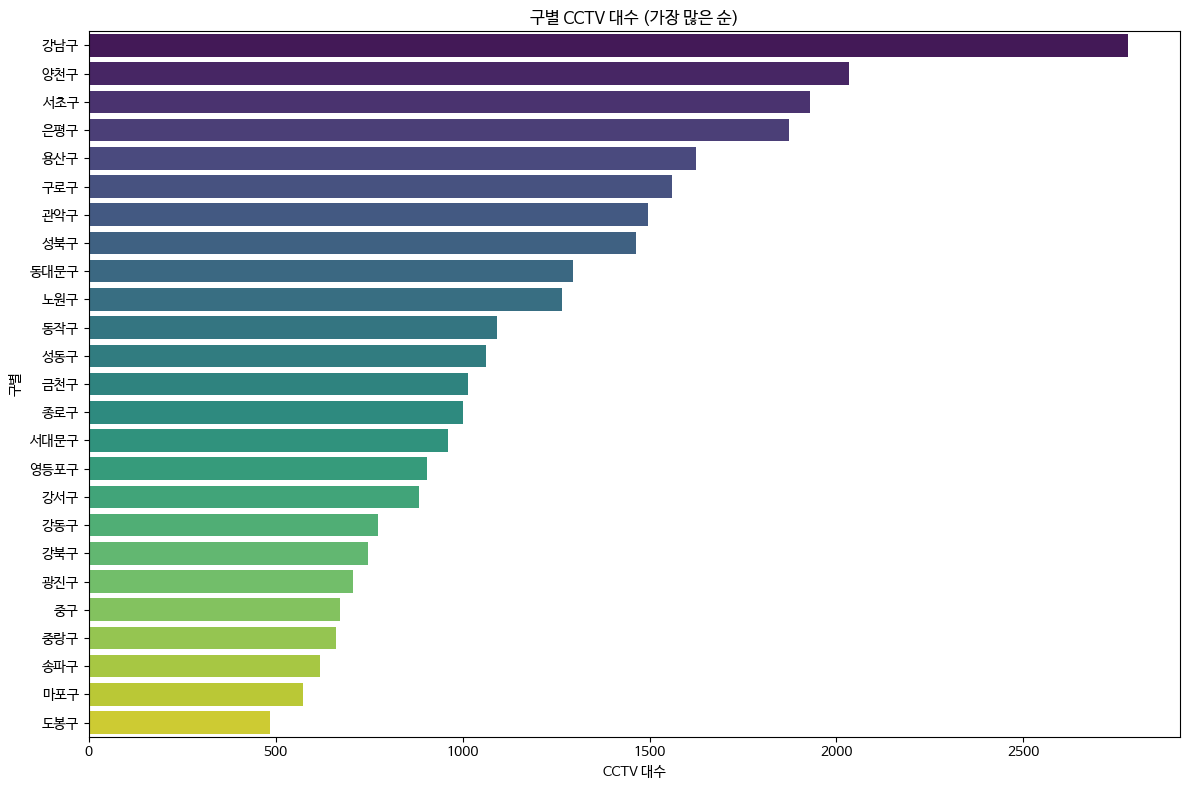

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by 'CCTV대수' in descending order
cctv_sorted = corrected_df.sort_values(by='CCTV대수', ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='CCTV대수', y='구별', data=cctv_sorted, palette='viridis')
plt.title('구별 CCTV 대수 (가장 많은 순)')
plt.xlabel('CCTV 대수')
plt.ylabel('구별')
plt.tight_layout()
plt.show()